# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 2:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>
### <center>NLP</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as skp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

pd.options.display.max_columns = None

Descargo los dataSet a usar

In [6]:
_x_train = pd.read_csv('./DataSet/TP2-NLP/x_train')
_x_train.drop(columns=['Unnamed: 0'],inplace=True)
_y_train = pd.read_csv('./DataSet/TP2-NLP/y_train')
_y_train.drop(columns=['Unnamed: 0'],inplace=True)
_x_test = pd.read_csv('./DataSet/TP2-NLP/x_test')
_x_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_test = pd.read_csv('./DataSet/TP2-NLP/y_test')
_y_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_train.rename(columns={'0':'pxm2'}, inplace=True)
_y_test.rename(columns={'0':'pxm2'}, inplace=True)

Creo una copia, asi no modifico el original

In [7]:
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

Descargo el dataSet de descripciones

In [ ]:
df_descrip = pd.read_csv("./DataSet/TP2-NLP/descripciones.csv")
df_descrip.head()

In [ ]:
df_descrip.shape

A continuacion unire los datos de mi dataSet con su respectiva descripcion mediante su id.

In [ ]:
x_train = pd.merge(x_train, df_descrip, on="id")

In [ ]:
x_test = pd.merge(x_test, df_descrip, on="id")

Ahora si puedo eliminar el feature id

In [ ]:
x_train.drop(columns='id', inplace=True)
x_test.drop(columns='id', inplace=True)
x_train.rename(columns={'property_description':'descripcion'}, inplace=True)
x_test.rename(columns={'property_description':'descripcion'}, inplace=True)

In [ ]:
x_train.head()

# Sentimientos y emociones

Con la gran polemica que twitter esta generando estos dias decidimos hacer un estudio sobre si existe una relacion entre las emociones/sentimientos de las descripciones con sus respectivos precios.<br>
Por eso tomamos un modelo ya preprocesado sobre un corpus de tweets y generaremos los siguientes features:

In [ ]:
#Mas info: https://github.com/pysentimiento/pysentimiento
from pysentimiento import create_analyzer 

## Sentimientos

In [ ]:
# Crearemos una instancia del objeto a usar
# Explicacion de los siguientes parametros
# Task: Nombre de la tarea, en este caso pediremos los sentimientos de las descripciones
# Lang: Idioma que usaremos, es -> español
analyzer = create_analyzer(task="sentiment", lang="es")

Comenzamos con un ejemplo
Predecimos una frase

In [ ]:
analyzer.predict("Qué gran jugador es Messi")

Observamos que nos devuelve un objeto con sus atributos:
   - Output: Como categorizo la frase, en este caso considero que la frase es positiva
   - Probas: Un diccionario con las probabilidades de que la frase sea positiva, negativa y neutra.

Observamos otro ejemplo:

In [ ]:
analyzer.predict("Esto es pésimo")

En este ejemplo considero la frase negativa y creemos que en definitiva si lo es.

Crearemos un feature con el porcentaje de sentimiento positivo de su descripcion.

Comenzamos con x_train.

In [ ]:
sentimiento_positivo_x_train = []

In [ ]:
for descrip in list(x_train.descripcion):
    analizador = analyzer.predict(descrip)
    sentimiento_positivo_x_train.append(analizador.probas['POS'])

Vamos a guardar el resultado porque el proceso es muy costoso y para no guardar el dataSet completo guardaremos el feature sentimiento con su respectivo id para luego unirlo con el dataSet completo.

In [ ]:
list_x_train_descrip = list(zip(list(_x_train.id), sentimiento_positivo_x_train))

In [ ]:
x_train_sentiment = pd.DataFrame(list_x_train_descrip)

In [ ]:
x_train_sentiment.rename(columns={0:'id', 1:'Sentimiento Positivo'}, inplace=True)

In [ ]:
#Lo guardamos
#x_train_sentiment.to_csv("./DataSet/TP2-NLP/x_train_sentiment")

Haremos el mismo proceso con el dataSet x_test.

In [ ]:
sentimiento_positivo_x_test = []

In [ ]:
for descrip in list(x_test.descripcion):
    analizador = analyzer.predict(descrip)
    sentimiento_positivo_x_test.append(analizador.probas['POS'])

In [ ]:
list_x_test_sentiment = list(zip(list(_x_test.id), sentimiento_positivo[-len(x_test):]))

In [ ]:
x_test_sentiment = pd.DataFrame(x_test_sentiment)

In [ ]:
x_test_sentiment.rename(columns={0:'id', 1:'Sentimiento Positivo'}, inplace=True)

In [ ]:
x_test_sentiment.head()

In [ ]:
#Lo guardamos
#x_test_sentiment.to_csv("./DataSet/TP2-NLP/x_test_sentiment")

## Emociones

In [ ]:
# Crearemos una instancia del objeto a usar
# Explicacion de los siguientes parametros
# Task: Nombre de la tarea, en este caso pediremos las emociones de las descripciones
# Lang: Idioma que usaremos, es -> español
emotion_analyzer = create_analyzer(task="emotion", lang="es")

Un ejemplo:

In [ ]:
emotion_analyzer.predict("Estoy muy triste")

Observamos que nos devuelve un objeto con 2 atributos:
   - Output: Como categorizo la frase, en este caso considero que la frase es triste
   - Probas: Un diccionario con las probabilidades de que la frase alegre, triste, sorpresa, miedo, enfado, otros, disgusto.

Crearemos 6 features, 1 por cada emocion y guardaremos en cada uno su respectiva probabilidad.

Comenzamos con x_train

In [ ]:
emociones_x_train = []

In [ ]:
for descrip in list(x_train.descripcion):
    analizador = emotion_analyzer.predict(descrip)
    probabilidades = analizador.probas
    emociones_x_train.append([probabilidades['joy'], probabilidades['sadness'], probabilidades['surprise'], probabilidades['fear'], probabilidades['anger'], probabilidades['others'], probabilidades['disgust']])

In [ ]:
x_train_emotion = pd.DataFrame(emociones_x_train)
x_train_emotion.rename(columns={0:'alegria', 1:'tristeza', 2:'sorpresa', 3: 'miedo', 4:'enfado', 5: 'otros', 6:'disgusto'}, inplace=True)
x_train_emotion['id'] = _x_train.id

In [ ]:
x_train_emotion

In [ ]:
#Lo guardamos
#x_train_emotion.to_csv("./DataSet/TP2-NLP/x_train_emotion")

Ahora con x_test

In [ ]:
emociones_x_test = []

In [ ]:
for descrip in list(x_test.descripcion):
    analizador = emotion_analyzer.predict(descrip)
    probabilidades = analizador.probas
    emociones_x_test.append([probabilidades['joy'], probabilidades['sadness'], probabilidades['surprise'], probabilidades['fear'], probabilidades['anger'], probabilidades['others'], probabilidades['disgust']])

In [ ]:
x_test_emotion = pd.DataFrame(emociones_x_test)
x_test_emotion.rename(columns={0:'alegria', 1:'tristeza', 2:'sorpresa', 3: 'miedo', 4:'enfado', 5: 'otros', 6:'disgusto'}, inplace=True)
x_test_emotion['id'] = _x_test.id

In [ ]:
x_test_emotion.head()

In [ ]:
#Lo guardamos
#x_test_emotion.to_csv("./DataSet/TP2-NLP/x_test_emotion")

# Comenzamos el analisis de sentimientos y uniones

Vamos a crear un arbol de regresion para saber si en realidad los features de emociones y sentimientos son importantes para calcular el precio.

Descargo los dataSet y uno los features de emociones y sentimientos con el dataSet principal

In [8]:
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

In [9]:
#Descargo los features de sentimientos
x_train_sentiment = pd.read_csv("./DataSet/TP2-NLP/x_train_sentiment")
x_train_sentiment.drop(columns='Unnamed: 0', inplace=True)
x_test_sentiment = pd.read_csv("./DataSet/TP2-NLP/x_test_sentiment")
x_test_sentiment.drop(columns='Unnamed: 0', inplace=True)
#Descargo los features de emociones
x_train_emotion = pd.read_csv("./DataSet/TP2-NLP/x_train_emotion")
x_train_emotion.drop(columns='Unnamed: 0', inplace=True)
x_test_emotion = pd.read_csv("./DataSet/TP2-NLP/x_test_emotion")
x_test_emotion.drop(columns='Unnamed: 0', inplace=True)

Uno los features de sentimientos y emociones con el dataSet principal.

In [10]:
#x_train
x_train = pd.merge(x_train, x_train_sentiment, on="id")
x_train = pd.merge(x_train, x_train_emotion, on="id")

In [11]:
x_train.head()

,id,latitud,longitud,ambientes,dormitorios,superficie_cubierta,comuna,Departamento,PH,Sentimiento Positivo,alegria,tristeza,sorpresa,miedo,enfado,otros,disgusto
0,JhrnbHggMI/+a3HqPvSHpA==,-34.583010,-58.481533,4.0,3.0,70.0,15,1.0,0.0,0.296470,0.290528,0.005603,0.014617,0.002689,0.007023,0.676980,0.002560
1,QgE3a9anrPSP3oqujv1C0g==,-34.660079,-58.485894,6.0,4.0,275.0,9,0.0,0.0,0.048648,0.257622,0.005772,0.018778,0.002709,0.004777,0.707761,0.002582
2,GdDiEcbXr0qGtVgRjZYIXQ==,-34.581856,-58.425088,3.0,2.0,97.0,14,1.0,0.0,0.949890,0.532302,0.011435,0.034491,0.006770,0.006357,0.403338,0.005306
3,EOc0KchotIHQCSq1oFQxyw==,-34.607547,-58.442194,2.0,1.0,42.0,6,1.0,0.0,0.244936,0.296273,0.006642,0.033718,0.006992,0.004343,0.647592,0.004440
4,vLV4Bu3fyY5e9Stj/b/Ekw==,-34.607416,-58.509680,2.0,1.0,38.0,11,1.0,0.0,0.757725,0.657242,0.011658,0.043448,0.009398,0.004551,0.267826,0.005878


In [12]:
#x_test
x_test = pd.merge(x_test, x_test_sentiment, on="id")
x_test = pd.merge(x_test, x_test_emotion, on="id")

In [13]:
x_test.head()

,id,latitud,longitud,ambientes,dormitorios,superficie_cubierta,Departamento,PH,comuna,Sentimiento Positivo,alegria,tristeza,sorpresa,miedo,enfado,otros,disgusto
0,L/i3QyPkam5OcxMoY4PD4A==,-34.577296,-58.407220,4.0,3.0,165.0,1.0,0.0,14,0.972614,0.879647,0.002303,0.011425,0.001547,0.001716,0.102002,0.001360
1,qb5jsGial8hrGHZFt4kjXA==,-34.545025,-58.460216,4.0,3.0,96.0,1.0,0.0,13,0.016784,0.052972,0.003644,0.010320,0.001605,0.003328,0.926906,0.001225
2,6sDtQxzc7YCbXMUl9V11ow==,-34.592060,-58.394667,4.0,3.0,118.0,1.0,0.0,2,0.093802,0.115030,0.007334,0.013896,0.002847,0.004355,0.854284,0.002254
3,CqquLglwqJ/fzqhm2nMxog==,-34.629050,-58.433047,1.0,1.0,33.0,1.0,0.0,7,0.380551,0.404646,0.006501,0.026653,0.004463,0.004921,0.548926,0.003889
4,nxWt1nd/+yFkzf2X6xdSfQ==,-34.592154,-58.378277,3.0,2.0,156.0,1.0,0.0,1,0.997235,0.968894,0.001639,0.016190,0.001075,0.001141,0.009884,0.001177


Elimino los feature id

In [14]:
x_train.drop(columns='id', inplace=True)
x_test.drop(columns='id', inplace=True)

Analizamos los valores de los features de emociones

In [15]:
df = x_train[['alegria', 'tristeza', 'sorpresa', 'miedo', 'enfado', 'otros', 'disgusto']]

In [16]:
df.head()

,alegria,tristeza,sorpresa,miedo,enfado,otros,disgusto
0,0.290528,0.005603,0.014617,0.002689,0.007023,0.676980,0.002560
1,0.257622,0.005772,0.018778,0.002709,0.004777,0.707761,0.002582
2,0.532302,0.011435,0.034491,0.006770,0.006357,0.403338,0.005306
3,0.296273,0.006642,0.033718,0.006992,0.004343,0.647592,0.004440
4,0.657242,0.011658,0.043448,0.009398,0.004551,0.267826,0.005878


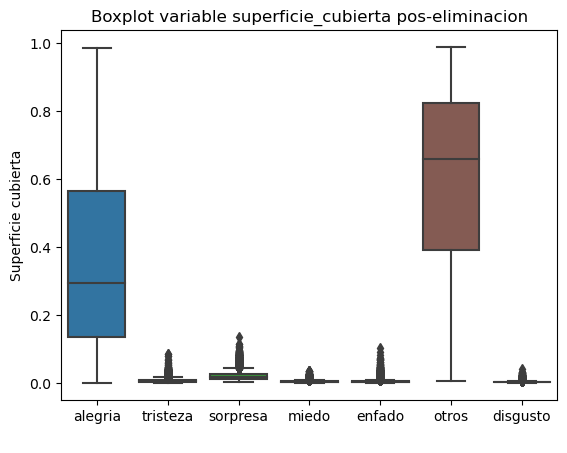

In [17]:
grf_box = sns.boxplot(data=df).set(
    title="Boxplot variable superficie_cubierta pos-eliminacion",
    xlabel=" ",
    ylabel="Superficie cubierta",
)

Observamos que alegria y otros tienen mayor variacion de datos.

Analizo su varianza

In [18]:
df.var()

alegria     0.071110
tristeza    0.000022
sorpresa    0.000115
miedo       0.000007
enfado      0.000012
otros       0.070530
disgusto    0.000004
dtype: float64

Decido eliminar los feature con varianza menor a 0.000020

In [19]:
f_a_eliminar = []

In [20]:
for f in df.columns:
    if df[f].var() < 0.000020:
        f_a_eliminar.append(f)

In [21]:
f_a_eliminar

['miedo', 'enfado', 'disgusto']

In [22]:
#Los elimino del dataSet, train y test
#Aclaro que el estudio fue hecho con los datos del train asi no sesgo los valores del test
x_train.drop(columns=f_a_eliminar, inplace=True)
x_test.drop(columns=f_a_eliminar, inplace=True)

In [23]:
x_test.head()

,latitud,longitud,ambientes,dormitorios,superficie_cubierta,Departamento,PH,comuna,Sentimiento Positivo,alegria,tristeza,sorpresa,otros
0,-34.577296,-58.407220,4.0,3.0,165.0,1.0,0.0,14,0.972614,0.879647,0.002303,0.011425,0.102002
1,-34.545025,-58.460216,4.0,3.0,96.0,1.0,0.0,13,0.016784,0.052972,0.003644,0.010320,0.926906
2,-34.592060,-58.394667,4.0,3.0,118.0,1.0,0.0,2,0.093802,0.115030,0.007334,0.013896,0.854284
3,-34.629050,-58.433047,1.0,1.0,33.0,1.0,0.0,7,0.380551,0.404646,0.006501,0.026653,0.548926
4,-34.592154,-58.378277,3.0,2.0,156.0,1.0,0.0,1,0.997235,0.968894,0.001639,0.016190,0.009884


### Arbol de regresion

Analizare la importancia de los features sentimiento y emociones con un arbol de regresion.

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
#Grilla de Parámetros
params_grid = { "criterion" : ["squared_error", "friedman_mse", "absolute_error"], 
               "min_samples_leaf" : [5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "splitter": ['random','best'] }

#Clasificador Arbol
tree = DecisionTreeRegressor(random_state = 5)

#Random Search con 5 Folds y 15 iteraciones
rand_tree_model1 = RandomizedSearchCV(tree, params_grid, scoring='neg_root_mean_squared_error', cv=5, n_iter=15, random_state=5)

rand_tree_model1.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=5),
                   n_iter=15,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 16],
                                        'splitter': ['random', 'best']},
                   random_state=5, scoring='neg_root_mean_squared_error')

In [26]:
print(f"Observamos que los parametros que performaron mejor son: {rand_tree_model1.best_estimator_}")

Observamos que los parametros que performaron mejor son: DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=10,
                      min_samples_split=10, random_state=5, splitter='random')


In [27]:
print(f"Y el error mas bajo fue: {rand_tree_model1.best_score_}")

Y el error mas bajo fue: -708.1974794125333


Este resultado sorprende porque en el TP1 cuando calculamos el arbol de regresion, el mejor error para el dataSet sin reducir fue: -1171.865033492837 y ahora tenemos un error que es casi la mitad.

Vaemos la importancia de los features

In [30]:
#Mejor estimador
best_tree=rand_tree_model1.best_estimator_
sorted(list(zip(x_train.columns, best_tree.feature_importances_)), key=lambda x: -x[1])

[('longitud', 0.30726374082019775),
 ('latitud', 0.2252740060183832),
 ('Departamento', 0.16532012078356534),
 ('superficie_cubierta', 0.11584866178439773),
 ('comuna', 0.08752482460558482),
 ('alegria', 0.020695319096288946),
 ('ambientes', 0.018788507643784612),
 ('otros', 0.01577008417466985),
 ('Sentimiento Positivo', 0.01438230352310374),
 ('dormitorios', 0.01078833914379046),
 ('tristeza', 0.00988952827707629),
 ('sorpresa', 0.007698542909535647),
 ('PH', 0.0007560212196215606)]

Observamos que el feature de alegria tiene una importancia mayor que la de ambientes, dormitorios y PH.<br>
Coincidencia? Yo no lo creo

<img src="https://www.fotosdememes.com/wp-content/uploads/2022/03/Coincidencia-no-lo-creo.jpg">

Guardo el arbol

In [63]:
dump(best_tree, './Modelos_TP2/DecisionTreeRegressor-model1.joblib') 

['./Modelos/DecisionTreeRegressor-model1.joblib']

# XGBoost

In [32]:
import xgboost as xgb

Normalizo con ZScore

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Modelo 1: XGBoost del TP1

Usare los parametros obtenidos en el TP1

In [46]:
xgboost_model1 = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05, min_child_weight=3)

In [48]:
xgboost_model1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
#Predigo
y_pred=xgboost_model1.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error

In [58]:
#Calculo el RMSE
mean_squared_error(y_test, y_pred, squared=False)

820.2106236039823

Lo guardamos

In [60]:
dump(xgboost_model1, './Modelos_TP2/XGBOOST-model1.joblib') 

['./Modelos/XGBOOST-model1.joblib']

## Modelo 2: XGBoost

In [34]:
#Grilla de Parámetros
params_grid={
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]
    }

#Clasificador XGBRegressor
xgbr = xgb.XGBRegressor(random_state = 0)

#Random Search con 5 Folds y 8 iteraciones
rand_xgboost_model2 = RandomizedSearchCV(xgbr, params_grid, scoring='neg_root_mean_squared_error', cv=5, n_iter=8, random_state=5)

rand_xgboost_model2.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=0,
                                          reg_alpha=None, reg_lambda=None,
                                          

In [35]:
print(f"Observamos que los parametros que performaron mejor son: {rand_xgboost_model2.best_estimator_}")

Observamos que los parametros que performaron mejor son: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [36]:
print(f"Y el error mas bajo fue: {rand_xgboost_model2.best_score_}")

Y el error mas bajo fue: -614.869862017698


Ahora veamos como nos anda en test

In [37]:
#Mejor estimador
best_xgbr=rand_xgboost_model2.best_estimator_

#Predicción con mejor estimador
y_pred=best_xgbr.predict(x_test)

#RootMean Squared Error
mean_squared_error(y_test, y_pred, squared=False)

847.7825981629121

Lo guardamos

In [38]:
dump(rand_xgboost_model2.best_estimator_, './Modelos_TP2/XGBOOST-model2.joblib') 

['./Modelos/XGBOOST-model2.joblib']

# Conclusiones

## Resumen de RMSE en test - TP1:
   + KNN - Model 1: 1217.401032628558
   + KNN - Model 2: 718.1341916561961
   + XGBoost - Model 1: 906.6026978535414
   + XGBoost - Model 2: 641.5620151352072
   + Arbol de Regresion - Model 1: 1077.7757830732962
   + Arbol de Regresion - Model 2: 655.5528626402848

## Resumen de RMSE en test - TP2:
   + XGBoost - Model 1: 820.2106236039823
   + XGBoost - Model 2: 847.7825981629121
   + Arbol de Regresion - Extra: 708.1974794125333

Si comparamos los modelos del tp2 con los modelos del TP1 que fueron construidos con los dataSets no reducidos, podemos decir que si son mejores y si hay una diferencia notoria.
Pero los modelos construidos con el dataSet reducido con PCA siguen siendo mejores por darnos un margen de error menor. <br>
Observacion: No se pedia, pero se observa que el arbol construido para ver la importancia de los feature dio una metrica muy buena, siendo mejor que los 2 XGBoost.